In [1]:
# to load, access, process and dump json files
import json
# regular repression
import re
# to parse HTML contents
from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-05-14 09:53:06.418746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-14 09:53:06.418766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [3]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
print('No. of rows and columns :', df.shape)
# show first few rows
df.head()

No. of rows and columns : (200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [4]:
def category_ngram(category, n):
    
    temp_df = df[df['category'] == category]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['headline'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [5]:
def plot_wordcloud(headlines, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(headlines)
    plt.axis('off')
    plt.imshow(wc)

In [6]:
def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [7]:
def plot_cm(pred, ticklabels, figsize):
      
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))

    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.set_yticklabels(ticklabels, rotation=0)

    plt.show()

There are 41 news categories


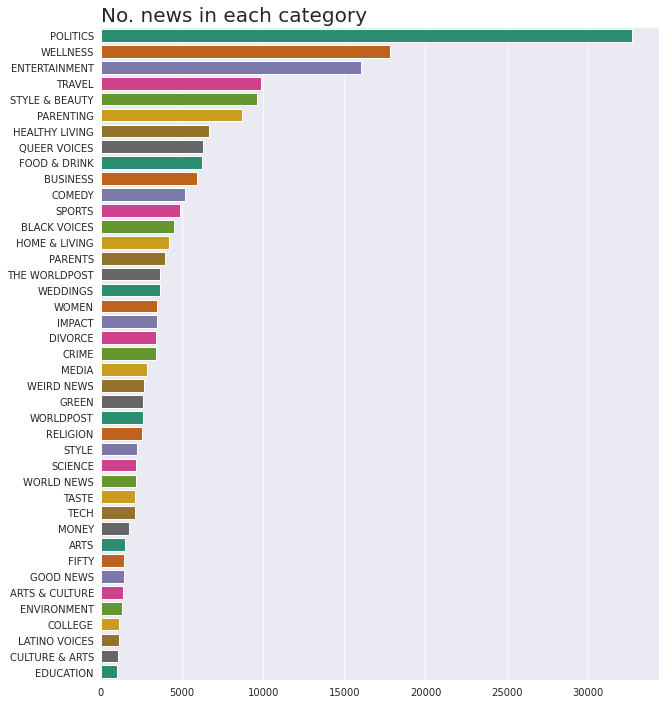

In [8]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [9]:
#delete the categorys with less than 100 news
df = df[df['category'].isin(count_df[count_df['category'] > 3000]['index'])]

#rename the category COMEDY to ENTERTAINMENT
df.loc[df['category'] == 'COMEDY', 'category'] = 'ENTERTAINMENT'


#delete the category QUEER VOICES
df = df[df['category'] != 'QUEER VOICES']
df = df[df['category'] != 'BLACK VOICES']
df = df[df['category'] != 'WEDDINGS']
df = df[df['category'] != 'THE WORLDPOST']
df = df[df['category'] != 'PARENTS']
df = df[df['category'] != 'IMPACT']
df = df[df['category'] != 'WOMEN']
df = df[df['category'] != 'WELLNESS']
df = df[df['category'] != 'DIVORCE']
df = df[df['category'] != 'PARENTING']




There are 10 news categories


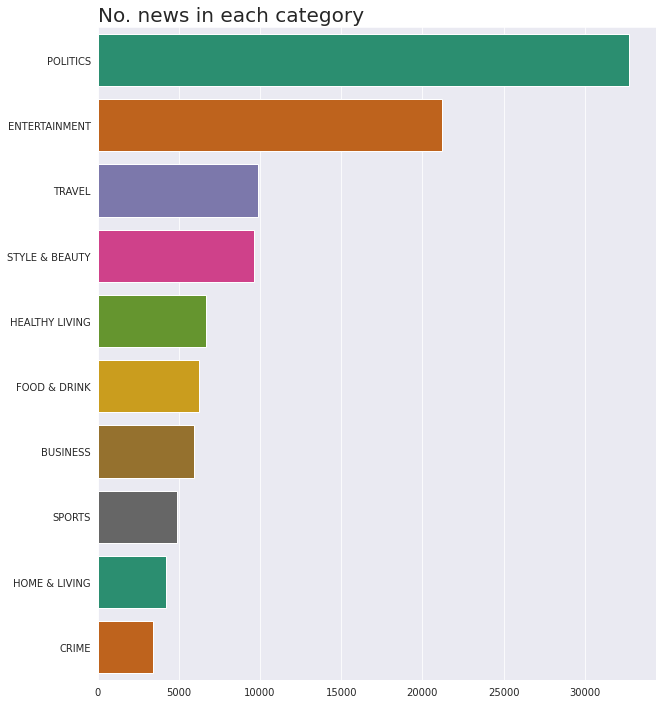

In [10]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [1029]:
#get the number o news in each category
print(df['category'].value_counts())

FOOD & DRINK      1004
POLITICS          1004
BUSINESS          1004
STYLE & BEAUTY    1004
CRIME             1004
HOME & LIVING     1004
SPORTS            1004
ENTERTAINMENT     1004
TRAVEL            1004
HEALTHY LIVING    1004
Name: category, dtype: int64


In [11]:
df = df.groupby('category').apply(lambda x: x.sample(3405))

There are 10 news categories


Text(0, 0.5, '')

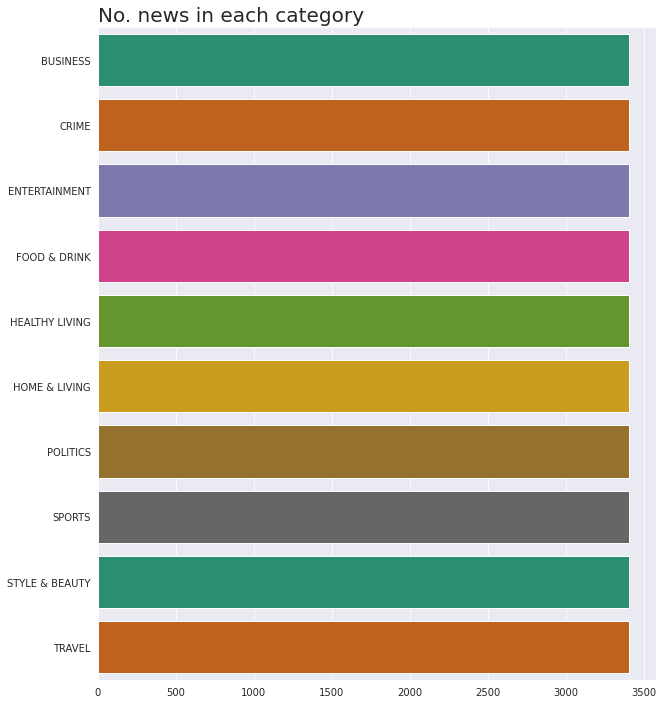

In [12]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('No. news in each category', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")

In [13]:
# container for dfs
dfs = []

# loop through each category and get 1004 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(1004))
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

,category,headline,authors,link,short_description,date
0,ENTERTAINMENT,Nina Simone Estate Tells Zoe Saldana To 'Take ...,Matthew Jacobs,https://www.huffingtonpost.com/entry/zoe-salda...,Saldana is facing criticism for portraying the...,2016-03-03
1,FOOD & DRINK,Retro Halloween Food Ads,"So Good, Contributor\nAn absurd look at the wo...",https://www.huffingtonpost.com/entry/retro-hal...,These Halloween themed magazine and newspaper ...,2012-10-29
2,HEALTHY LIVING,Lessons From Chronic Pain,"M. Shin, ContributorM. Shin is in her third ye...",https://www.huffingtonpost.com/entry/lessons-f...,One of the hardest aspects about living with a...,2015-01-30
3,BUSINESS,World's Richest Lose $194 Billion In First Tra...,,https://www.huffingtonpost.comhttp://www.bloom...,The world’s 400 richest people lost almost $19...,2016-01-10
4,HEALTHY LIVING,The Impact Of Zika On Asian Countries May Be G...,"Julie Steenhuysen and Amy Sawitta Lefevre, Reu...",https://www.huffingtonpost.com/entry/the-impac...,“Zika is Zika until proven otherwise. We assum...,2016-11-23


In [14]:
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [15]:
# apply preprocessing steps

df['headline'] = df['headline'].str.lower() +" "+ df['short_description'].str.lower()
df['headline'] = df['headline'].apply(alpha_num)
df['headline'] = df['headline'].apply(remove_stopwords)

df.head()

,category,headline,authors,link,short_description,date
0,ENTERTAINMENT,nina simone estate tells zoe saldana take nina...,Matthew Jacobs,https://www.huffingtonpost.com/entry/zoe-salda...,Saldana is facing criticism for portraying the...,2016-03-03
1,FOOD & DRINK,retro halloween food ads halloween themed maga...,"So Good, Contributor\nAn absurd look at the wo...",https://www.huffingtonpost.com/entry/retro-hal...,These Halloween themed magazine and newspaper ...,2012-10-29
2,HEALTHY LIVING,lessons chronic pain one hardest aspects livin...,"M. Shin, ContributorM. Shin is in her third ye...",https://www.huffingtonpost.com/entry/lessons-f...,One of the hardest aspects about living with a...,2015-01-30
3,BUSINESS,worlds richest lose 194 billion first trading ...,,https://www.huffingtonpost.comhttp://www.bloom...,The world’s 400 richest people lost almost $19...,2016-01-10
4,HEALTHY LIVING,impact zika asian countries may graver thought...,"Julie Steenhuysen and Amy Sawitta Lefevre, Reu...",https://www.huffingtonpost.com/entry/the-impac...,“Zika is Zika until proven otherwise. We assum...,2016-11-23


In [16]:
# unique news category
df['category'].unique()

array(['ENTERTAINMENT', 'FOOD & DRINK', 'HEALTHY LIVING', 'BUSINESS',
       'SPORTS', 'HOME & LIVING', 'STYLE & BEAUTY', 'TRAVEL', 'CRIME',
       'POLITICS'], dtype=object)

In [17]:
# container for sentences
news = np.array([headline for headline in df['headline']])

# container for labels
labels = np.array([label for label in df['category']])

In [25]:
# Label encoding news category
enc = LabelEncoder()
labels = enc.fit_transform(labels)
# print(enc.classes_)

In [960]:
# Label encoding news category
enc = LabelEncoder()
labels = enc.fit_transform(labels)
# print(enc.classes_)

In [26]:
# parameters

vocab_size = 10000
embedding_dim = 16
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [27]:
# train-test split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(news, labels, 
                                                                                          test_size=0.20, 
                                                                                          stratify=labels)

In [28]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [29]:
# model initialization
from keras import metrics 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=[metrics.SparseCategoricalAccuracy('accuracy')])

# model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
 dense_3 (Dense)             (None, 10)                250       
                                                                 
Total params: 204,818
Trainable params: 204,818
Non-trainable params: 0
________________________________________________

In [30]:
# fit model
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.20)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/5
201/201 - 14s - loss: 2.1826 - accuracy: 0.1647 - val_loss: 1.8956 - val_accuracy: 0.2657 - 14s/epoch - 69ms/step
Epoch 2/5
201/201 - 10s - loss: 1.5593 - accuracy: 0.4154 - val_loss: 1.4784 - val_accuracy: 0.4823 - 10s/epoch - 47ms/step
Epoch 3/5
201/201 - 10s - loss: 1.0375 - accuracy: 0.6265 - val_loss: 1.3662 - val_accuracy: 0.5464 - 10s/epoch - 48ms/step
Epoch 4/5
201/201 - 9s - loss: 0.7159 - accuracy: 0.7589 - val_loss: 1.4523 - val_accuracy: 0.5657 - 9s/epoch - 47ms/step
Epoch 5/5
201/201 - 9s - loss: 0.4793 - accuracy: 0.8448 - val_loss: 1.7587 - val_accuracy: 0.5569 - 9s/epoch - 47ms/step


In [31]:
train_labels

array([5, 1, 8, ..., 0, 7, 9])

KeyError: 'sparse_categorical_accuracy'

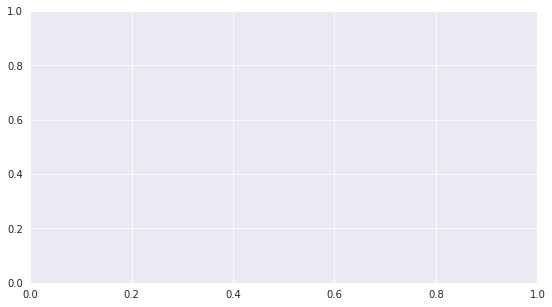

In [32]:
plot_history(history)

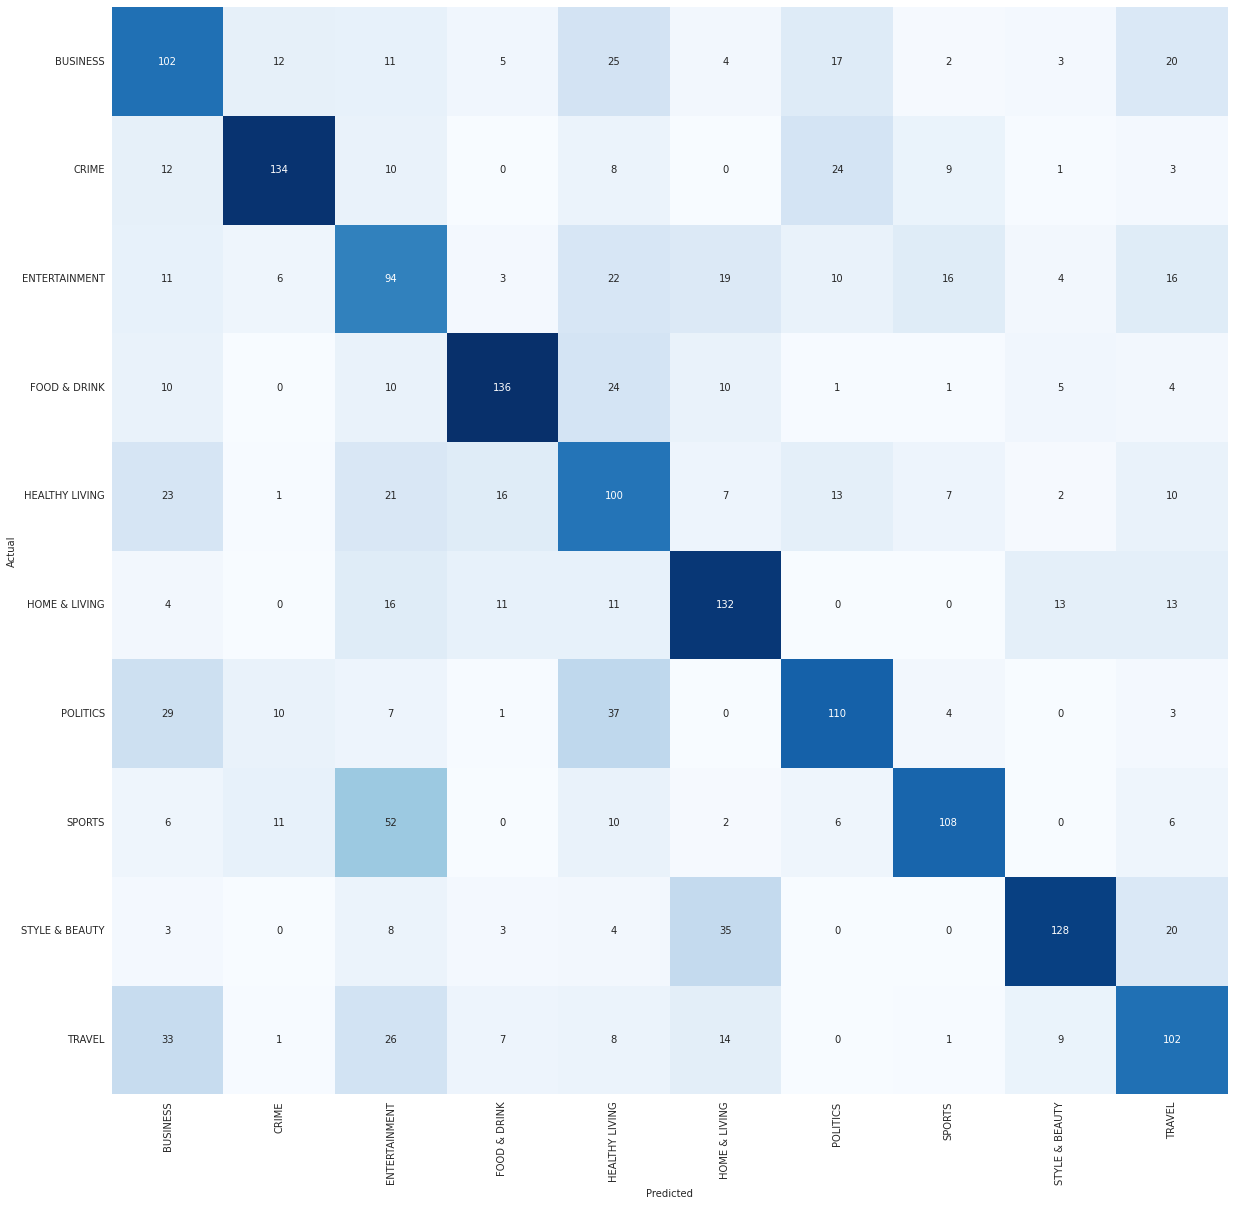

In [977]:
plot_cm(pred, enc.classes_, 20)

In [988]:
sentence = ["Two women recall what happened when Russia took over a strategically-important city in the Donbas.", 
            "Kaepernick has been attempting an NFL comeback since 2016 but has not convinced a team to sign him. He hasn’t played a snap of football since the season he launched a protest against racial injustice during the national anthem."]

##apllying preprocessing steps
sentence = [s.lower() for s in sentence]
sentence = [alpha_num(s) for s in sentence]
sentence = [remove_stopwords(s) for s in sentence]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred=(model.predict(padded))
#make all values in pred float with 2 decimales
pred = np.around(pred, decimals=2)

print(pred)
# get the biggest value from the prediction
pred = np.argmax(model.predict(padded), axis=1)


print(pred)
for i in pred:
    print(enc.classes_[i])


[[0.81 0.   0.05 0.   0.   0.   0.   0.   0.   0.14]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]
[0 7]
BUSINESS
SPORTS


In [1028]:
model.evaluate(validation_padded, validation_labels)

2022-05-14 02:03:10.851408: W tensorflow/core/framework/op_kernel.cc:1722] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ciprian/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 965, in launch_instance
      app.start()
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/ciprian/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/ciprian/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ciprian/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_195514/4191500676.py", line 1, in <cell line: 1>
      model.evaluate(validation_padded, validation_labels)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1716, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1525, in test_function
      return step_function(self, iterator)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1514, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1507, in run_step
      outputs = model.test_step(data)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1474, in test_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/ciprian/.local/lib/python3.10/site-packages/keras/metrics.py", line 720, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_test_function_2143067]